# Investigate the augmented trajectories

## Analyze the `round_table` augmentation

### Qualitatively analyze trajectories

In [3]:
from pathlib import Path
from src.visualization.render_mp4 import (
    mp4_from_pickle_jupyter,
    unpickle_data,
    pickle_data,
)
from src.common.files import get_raw_paths
import random
from tqdm import tqdm
import os

base_dir = Path("tmp")

os.environ['DATA_DIR_RAW']='/media/yufei/Yufei/juicer_data'
os.environ['DATA_DIR_PROCESSED']='/media/yufei/Yufei/juicer_data'

In [4]:
paths = get_raw_paths(
    environment="sim",
    demo_source="augmentation",
    demo_outcome="success",
    task="round_table",
    randomness="low",
)

random.shuffle(paths)

len(paths), paths[:3]

Found the following paths:
    /media/yufei/Yufei/juicer_data/raw/sim/round_table/augmentation/low/success/*.pkl*


(1034,
 [PosixPath('/media/yufei/Yufei/juicer_data/raw/sim/round_table/augmentation/low/success/2024-03-01T12:31:04.pkl.xz'),
  PosixPath('/media/yufei/Yufei/juicer_data/raw/sim/round_table/augmentation/low/success/2024-03-01T19:30:52.pkl.xz'),
  PosixPath('/media/yufei/Yufei/juicer_data/raw/sim/round_table/augmentation/low/success/2024-02-17T20:39:39.pkl.xz')])

In [5]:
# Loop over and see that I can read them all
for path in tqdm(paths):
    try:
        data = unpickle_data(path)
    except Exception as e:
        print(f"Failed to read {path}")
        print(e)

100%|██████████| 1034/1034 [01:35<00:00, 10.77it/s]


In [6]:
for path in paths[:20]:
    mp4_from_pickle_jupyter(
        path, filename=(base_dir / path.stem).with_suffix(".mp4"), fps=20
    )

FileNotFoundError: The directory '/home/yufei/juicer/imitation-juicer/notebooks/tmp' does not exist

### Plot coverage of new trajectories

In [8]:
import zarr
import matplotlib.pyplot as plt
import numpy as np


from src.common.files import get_processed_paths

In [9]:
aug_path, teleop_path = sorted(
    get_processed_paths(
        environment="sim",
        demo_source=["teleop", "augmentation"],
        demo_outcome="success",
        task="round_table",
        randomness="low",
    )
)

aug_path, teleop_path

Found the following paths:
    /media/yufei/Yufei/juicer_data/processed/sim/round_table/teleop/low/success.zarr
    /media/yufei/Yufei/juicer_data/processed/sim/round_table/augmentation/low/success.zarr


(PosixPath('/media/yufei/Yufei/juicer_data/processed/sim/round_table/augmentation/low/success.zarr'),
 PosixPath('/media/yufei/Yufei/juicer_data/processed/sim/round_table/teleop/low/success.zarr'))

In [10]:
z_aug = zarr.open(str(aug_path), mode="r")
z_teleop = zarr.open(str(teleop_path), mode="r")

ends_aug = z_aug["episode_ends"][:]
ends_teleop = z_teleop["episode_ends"][:]

pos_teleop = z_teleop["robot_state"][:, :3]
pos_aug = z_aug["robot_state"][:, :3]

# Split the data into episodes
pos_teleop = np.split(pos_teleop, ends_teleop[:-1])
pos_aug = np.split(pos_aug, ends_aug[:-1])

# # Concat them together again
pos_teleop = np.concatenate(pos_teleop)
pos_aug = np.concatenate(pos_aug)

In [11]:
len(ends_teleop), len(pos_teleop), len(ends_aug), len(pos_aug)

(50, 47246, 728, 44535)

### Plot the state-space coverage in 3D

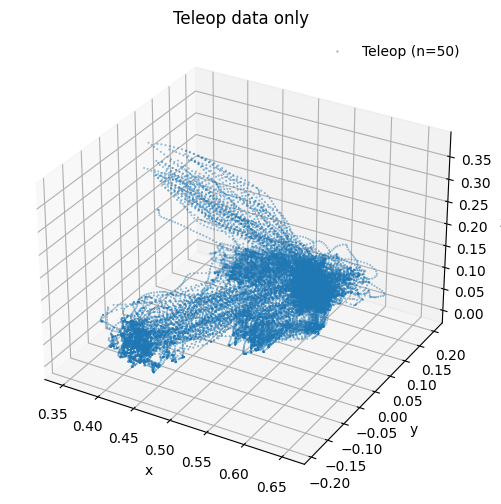

In [12]:
fig = plt.figure(figsize=(6, 6))

# Add a subplot for teleop data in the left side of the figure
ax1 = fig.add_subplot(
    111, projection="3d"
)  # Changed from 111 to 121 for a 1x2 grid, first position
ax1.scatter(*pos_teleop.T, label=f"Teleop (n={len(ends_teleop)})", s=0.1)
ax1.legend(frameon=False)
ax1.set_title("Teleop data only")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("z")

plt.show()

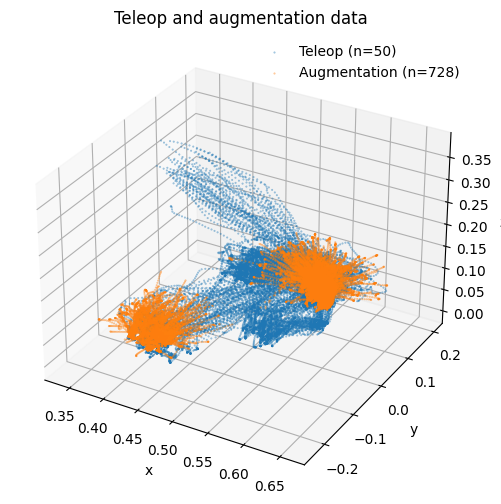

In [14]:
fig = plt.figure(figsize=(6, 6))

# Add a subplot for augmentation data in the right side of the figure
ax2 = fig.add_subplot(
    111, projection="3d"
)  # Changed from 111 to 122 for a 1x2 grid, second position
ax2.scatter(*pos_teleop.T, label=f"Teleop (n={len(ends_teleop)})", s=0.2, alpha=0.5)
ax2.scatter(*pos_aug.T, label=f"Augmentation (n={len(ends_aug)})", s=0.2, alpha=0.5)
ax2.legend(frameon=False)
ax2.set_title("Teleop and augmentation data")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_zlabel("z")

#plt.savefig("figs/teleop_augmentation.png")

plt.show()

## Analyze the `lamp` augmentation

### Qualitatively analyze trajectories

In [15]:
from pathlib import Path
from src.visualization.render_mp4 import (
    mp4_from_pickle_jupyter,
    unpickle_data,
    pickle_data,
)
from src.common.files import get_raw_paths
import random
from tqdm import tqdm

base_dir = Path("tmp")

In [16]:
paths = get_raw_paths(
    environment="sim",
    demo_source="augmentation",
    demo_outcome="success",
    task="lamp",
    randomness="low",
)

# random.shuffle(paths)

paths = sorted(paths, reverse=True)

len(paths), paths[:3]

Found the following paths:
    /media/yufei/Yufei/juicer_data/raw/sim/lamp/augmentation/low/success/*.pkl*


(1311,
 [PosixPath('/media/yufei/Yufei/juicer_data/raw/sim/lamp/augmentation/low/success/2024-02-27T23:50:30.pkl.xz'),
  PosixPath('/media/yufei/Yufei/juicer_data/raw/sim/lamp/augmentation/low/success/2024-02-27T23:47:54.pkl.xz'),
  PosixPath('/media/yufei/Yufei/juicer_data/raw/sim/lamp/augmentation/low/success/2024-02-27T23:46:48.pkl.xz')])

In [17]:
for path in tqdm(paths):
    data = unpickle_data(path)
    if True or data.get("critical_state", -1) == 1:
        mp4_from_pickle_jupyter(
            path, filename=(base_dir / path.stem).with_suffix(".mp4"), fps=20
        )

  0%|          | 0/1311 [00:00<?, ?it/s]


FileNotFoundError: The directory '/home/yufei/juicer/imitation-juicer/notebooks/tmp' does not exist

### Get stats on what critical state each is from

In [18]:
from collections import defaultdict

In [19]:
# Iterate over the paths and read in the data
critical_state_paths = defaultdict(list)
for path in tqdm(paths):
    data = unpickle_data(path)

    critical_state = data.get("critical_state", 2)

    critical_state_paths[critical_state].append(path)

100%|██████████| 1311/1311 [01:36<00:00, 13.57it/s]


In [37]:
# Budget of 400 augmentations
400 / len(critical_state_paths)

#5 bottleck regions

80.0

In [38]:
[(k, len(v)) for k, v in critical_state_paths.items()]

[(2, 831), (0, 123), (4, 241), (3, 101), (1, 15)]

In [41]:
# Pick 80 from each category at random
random_paths = []
for paths in critical_state_paths.values():
    random_paths.extend(random.sample(paths, min(80, len(paths))))

len(random_paths)

335

In [43]:
from random import sample

def create_balanced_dataset(items_by_class, target_per_class=80, total_target=400):
    selected_items = []
    all_items = []
    for class_items in items_by_class.values():
        all_items.extend(class_items)
        if len(class_items) >= target_per_class:
            selected_items.extend(sample(class_items, target_per_class))
        else:
            selected_items.extend(class_items)
    
    shortfall = total_target - len(selected_items)
    remaining_items = [item for item in all_items if item not in selected_items]
    
    if shortfall > 0:
        selected_items.extend(sample(remaining_items, shortfall))
    
    return selected_items


balanced_dataset = create_balanced_dataset(critical_state_paths)

balanced_dataset
len(balanced_dataset)


400

In [44]:
# Iterate over the paths and read in the data
critical_state_paths_balanced = defaultdict(list)
for path in tqdm(balanced_dataset):
    data = unpickle_data(path)

    critical_state = data.get("critical_state", 2)

    critical_state_paths_balanced[critical_state].append(path)



100%|██████████| 400/400 [00:29<00:00, 13.63it/s]


In [45]:
[(k, len(v)) for k, v in critical_state_paths_balanced.items()]

[(2, 127), (0, 83), (4, 93), (3, 82), (1, 15)]

In [48]:
# Copy the files from the original location to a new location
from shutil import copy

for path in tqdm(balanced_dataset):
    new_path = Path(str(path).replace("success", "balanced"))
    copy(path, new_path)

path

100%|██████████| 400/400 [00:00<00:00, 659.83it/s]


PosixPath('/media/yufei/Yufei/juicer_data/raw/sim/lamp/augmentation/low/success/2024-02-19T19:33:55.pkl.xz')

### Plot coverage of new trajectories

In [49]:
import zarr
import matplotlib.pyplot as plt
import numpy as np


from src.common.files import get_processed_paths

In [50]:
aug_path, teleop_path = sorted(
    get_processed_paths(
        environment="sim",
        demo_source=["teleop", "augmentation"],
        demo_outcome="success",
        task="lamp",
        randomness="low",
    )
)

aug_path, teleop_path

Found the following paths:
    /media/yufei/Yufei/juicer_data/processed/sim/lamp/teleop/low/success.zarr
    /media/yufei/Yufei/juicer_data/processed/sim/lamp/augmentation/low/success.zarr


(PosixPath('/media/yufei/Yufei/juicer_data/processed/sim/lamp/augmentation/low/success.zarr'),
 PosixPath('/media/yufei/Yufei/juicer_data/processed/sim/lamp/teleop/low/success.zarr'))

In [51]:
z_aug = zarr.open(str(aug_path), mode="r")
z_teleop = zarr.open(str(teleop_path), mode="r")

ends_aug = z_aug["episode_ends"][:]
ends_teleop = z_teleop["episode_ends"][:]

pos_teleop = z_teleop["robot_state"][:, :3]
pos_aug = z_aug["robot_state"][:, :3]

# Split the data into episodes
pos_teleop = np.split(pos_teleop, ends_teleop[:-1])
pos_aug = np.split(pos_aug, ends_aug[:-1])

# # Get the skill labels for the teleop data and split them into episodes
# skill_teleop = z_teleop["critical"][:]
# skill_teleop = np.split(skill_teleop, ends_teleop[:-1])

# # For the teleop data, we slice off the data after the insertion
# pos_teleop = [
#     ep[: np.where(skill == 1)[0][3] + 1] for ep, skill in zip(pos_teleop, skill_teleop)
# ]

# # Concat them together again
pos_teleop = np.concatenate(pos_teleop)
pos_aug = np.concatenate(pos_aug)

In [52]:
len(ends_teleop), len(pos_teleop), len(ends_aug), len(pos_aug)

(50, 43267, 400, 21634)

### Plot the state-space coverage in 3D

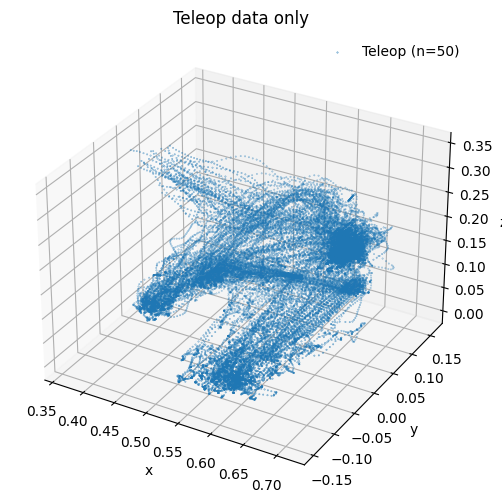

In [53]:
fig = plt.figure(figsize=(6, 6))

# Add a subplot for teleop data in the left side of the figure
ax1 = fig.add_subplot(111, projection="3d")

ax1.scatter(*pos_teleop.T, label=f"Teleop (n={len(ends_teleop)})", s=0.1)

ax1.legend(frameon=False)
ax1.set_title("Teleop data only")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("z")

plt.show()

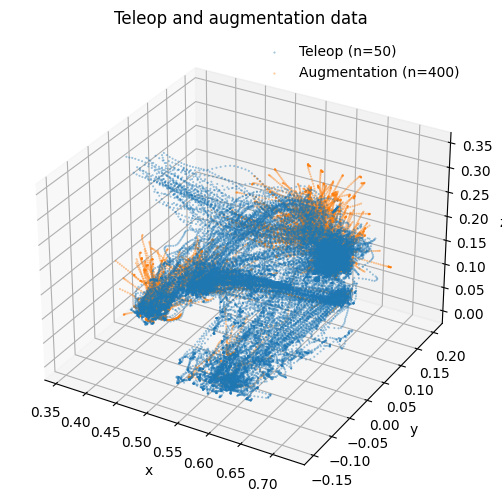

In [54]:
fig = plt.figure(figsize=(6, 6))

# Add a subplot for augmentation data in the right side of the figure
ax2 = fig.add_subplot(
    111, projection="3d"
)  # Changed from 111 to 122 for a 1x2 grid, second position
ax2.scatter(*pos_teleop.T, label=f"Teleop (n={len(ends_teleop)})", s=0.2, alpha=0.5)
ax2.scatter(*pos_aug.T, label=f"Augmentation (n={len(ends_aug)})", s=0.2, alpha=0.5)
ax2.legend(frameon=False)
ax2.set_title("Teleop and augmentation data")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_zlabel("z")

plt.savefig("teleop_augmentation.pdf")

plt.show()

## Analyze the `square_table` augmentation

In [ ]:
from pathlib import Path
from src.visualization.render_mp4 import (
    mp4_from_pickle_jupyter,
    unpickle_data,
    pickle_data,
)
from src.common.files import get_raw_paths
import random
from tqdm import tqdm

In [ ]:
paths = get_raw_paths(
    environment="sim",
    demo_source="augmentation",
    demo_outcome="success",
    task="square_table",
    randomness="low",
)

random.shuffle(paths)

len(paths), paths[:3]

In [ ]:
for path in paths[:5]:
    mp4_from_pickle_jupyter(path, filename=path.stem + ".mp4", fps=20)

### Plot coverage of new trajectories

In [ ]:
import zarr
import matplotlib.pyplot as plt
import numpy as np


from src.common.files import get_processed_paths

In [ ]:
aug_path, teleop_path = sorted(
    get_processed_paths(
        environment="sim",
        demo_source=["teleop", "augmentation"],
        demo_outcome="success",
        task="square_table",
        randomness="low",
    )
)

aug_path, teleop_path

In [ ]:
z_aug = zarr.open(str(aug_path), mode="r")
z_teleop = zarr.open(str(teleop_path), mode="r")

ends_aug = z_aug["episode_ends"][:]
ends_teleop = z_teleop["episode_ends"][:]

pos_teleop = z_teleop["robot_state"][:, :3]
pos_aug = z_aug["robot_state"][:, :3]

# Split the data into episodes
pos_teleop = np.split(pos_teleop, ends_teleop[:-1])
pos_aug = np.split(pos_aug, ends_aug[:-1])

# # Get the skill labels for the teleop data and split them into episodes
# skill_teleop = z_teleop["critical"][:]
# skill_teleop = np.split(skill_teleop, ends_teleop[:-1])

# # For the teleop data, we slice off the data after the insertion
# pos_teleop = [
#     ep[: np.where(skill == 1)[0][3] + 1] for ep, skill in zip(pos_teleop, skill_teleop)
# ]

# # Concat them together again
pos_teleop = np.concatenate(pos_teleop)
pos_aug = np.concatenate(pos_aug)

In [ ]:
len(ends_teleop), len(pos_teleop), len(ends_aug), len(pos_aug)

In [ ]:
# Sample a subset of the data
idx = np.random.choice(len(pos_teleop), size=53584, replace=False)
pos_teleop = pos_teleop[idx]

### Plot the state-space coverage in 3D

In [ ]:
fig = plt.figure(figsize=(6, 6))

# Add a subplot for teleop data in the left side of the figure
ax1 = fig.add_subplot(111, projection="3d")

ax1.scatter(*pos_teleop.T, label=f"Teleop (n={len(ends_teleop)})", s=0.1)

ax1.legend(frameon=False)
ax1.set_title("Teleop data only")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("z")

plt.show()

In [ ]:
fig = plt.figure(figsize=(6, 6))

# Add a subplot for augmentation data in the right side of the figure
ax2 = fig.add_subplot(
    111, projection="3d"
)  # Changed from 111 to 122 for a 1x2 grid, second position
ax2.scatter(*pos_teleop.T, label=f"Teleop (n={len(ends_teleop)})", s=0.2, alpha=0.5)
ax2.scatter(*pos_aug.T, label=f"Augmentation (n={len(ends_aug)})", s=0.2, alpha=0.5)
ax2.legend(frameon=False)
ax2.set_title("Teleop and augmentation data")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_zlabel("z")

plt.savefig("teleop_augmentation.pdf")

plt.show()

## Analyze the `one_leg` augmentation

In [ ]:
from pathlib import Path
from src.visualization.render_mp4 import (
    mp4_from_pickle_jupyter,
    unpickle_data,
    pickle_data,
)
from src.common.files import get_raw_paths
import random
from tqdm import tqdm

base_dir = Path("tmp")

In [ ]:
paths = get_raw_paths(
    environment="sim",
    demo_source="augmentation",
    demo_outcome="success",
    task="one_leg",
    randomness="low",
)

paths = sorted(paths, reverse=False)
# random.shuffle(paths)

len(paths), paths[:3]

In [ ]:
for path in paths[:50]:
    data = unpickle_data(path)
    print(len(data["observations"]))
    mp4_from_pickle_jupyter(
        path, filename=(base_dir / path.stem).with_suffix(".mp4"), fps=20
    )

### Plot coverage of new trajectories

In [ ]:
import zarr
import matplotlib.pyplot as plt
import numpy as np


from src.common.files import get_processed_paths

In [ ]:
aug_path, teleop_path = sorted(
    get_processed_paths(
        environment="sim",
        demo_source=["teleop", "augmentation"],
        demo_outcome="success",
        task="one_leg",
        randomness="low",
    )
)

aug_path, teleop_path

In [ ]:
z_aug = zarr.open(str(aug_path), mode="r")
z_teleop = zarr.open(str(teleop_path), mode="r")

ends_aug = z_aug["episode_ends"][:]
ends_teleop = z_teleop["episode_ends"][:]

pos_teleop = z_teleop["robot_state"][:, :3]
pos_aug = z_aug["robot_state"][:, :3]

# Split the data into episodes
pos_teleop = np.split(pos_teleop, ends_teleop[:-1])
pos_aug = np.split(pos_aug, ends_aug[:-1])

# # Get the skill labels for the teleop data and split them into episodes
# skill_teleop = z_teleop["critical"][:]
# skill_teleop = np.split(skill_teleop, ends_teleop[:-1])

# # For the teleop data, we slice off the data after the insertion
# pos_teleop = [
#     ep[: np.where(skill == 1)[0][3] + 1] for ep, skill in zip(pos_teleop, skill_teleop)
# ]

# # Concat them together again
pos_teleop = np.concatenate(pos_teleop)
pos_aug = np.concatenate(pos_aug)

In [ ]:
len(ends_teleop), len(pos_teleop), len(ends_aug), len(pos_aug)

In [ ]:
n_teleop = len(pos_teleop)
mean_len_aug = np.diff(ends_aug).mean()

In [ ]:
for p in [10, 20, 30, 50]:
    # Format as percent with no decimal places
    print(
        f"{p/100:.0%} of teleop data: {n_teleop*p/100:.0f} timesteps, i.e., {n_teleop*p/100 /mean_len_aug:.0f} augmented trajectories"
    )

print()
for n in [50, 100, 150, 200, 250]:
    print(
        f"{n} augmented trajectories: {n*mean_len_aug:.0f} timesteps, i.e., {n*mean_len_aug/n_teleop:.0%} of teleop data"
    )

In [ ]:
plt.hist(np.diff(ends_aug))

In [ ]:
# Sample a subset of the data
idx = np.random.choice(len(pos_teleop), size=53584, replace=False)
pos_teleop = pos_teleop[idx]

### Plot the state-space coverage in 3D

In [ ]:
fig = plt.figure(figsize=(6, 6))

# Add a subplot for teleop data in the left side of the figure
ax1 = fig.add_subplot(111, projection="3d")

ax1.scatter(*pos_teleop.T, label=f"Teleop (n={len(ends_teleop)})", s=0.1)

ax1.legend(frameon=False)
ax1.set_title("Teleop data only")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("z")

plt.show()

In [ ]:
fig = plt.figure(figsize=(6, 6))

# Add a subplot for augmentation data in the right side of the figure
ax2 = fig.add_subplot(
    111, projection="3d"
)  # Changed from 111 to 122 for a 1x2 grid, second position
ax2.scatter(*pos_teleop.T, label=f"Teleop (n={len(ends_teleop)})", s=0.2, alpha=0.5)
ax2.scatter(*pos_aug.T, label=f"Augmentation (n={len(ends_aug)})", s=0.2, alpha=0.5)
ax2.legend(frameon=False)
ax2.set_title("Teleop and augmentation data")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_zlabel("z")

plt.savefig("teleop_augmentation.pdf")

plt.show()

In [ ]:
from src.models.unet import ConditionalUnet1D

In [ ]:
net = ConditionalUnet1D(10, 272)

In [ ]:
# Print the total number of parameters and parameters in each submodule
for name, param in net.named_parameters():
    print(name, param.numel())